In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot



from sklearn.manifold import TSNE # TSNE module

In [2]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [3]:
print('Leyendo las bases de datos')
analysis = pd.read_csv("D:/jupyter/practica/Analysis/snif.csv", sep = '\s+')   #1
backdoor = pd.read_csv("D:/jupyter/practica/Backdoor/snif.csv", sep = '\s+')   #2
dos = pd.read_csv("D:/jupyter/practica/Dos/snif.csv",  sep = '\s+')            #3
exploit = pd.read_csv("D:/jupyter/practica/Exploit/snif.csv", sep = '\s+')     #4 
fuzzer = pd.read_csv("D:/jupyter/practica/Fuzzer/snif.csv", sep = '\s+')       #5
generic = pd.read_csv("D:/jupyter/practica/Generic/snif.csv", sep = '\s+')     #6
reconn = pd.read_csv("D:/jupyter/practica/Reconnaissance/snif.csv", sep = '\s+')#7
shell = pd.read_csv("D:/jupyter/practica/Shellcode/snif.csv", sep = '\s+')     #8
worm = pd.read_csv("D:/jupyter/practica/Worm/snif.csv", sep = '\s+')           #9

Leyendo las bases de datos


In [4]:
analysis.columns = ('dur','smean','sbytes','ackdat','sload','dload','dmean','port')
backdoor.columns = ('dur','smean','sbytes','ackdat','sload','dload','dmean','port')
dos.columns = ('dur','smean','sbytes','ackdat','sload','dload','dmean','port')
exploit.columns = ('dur','smean','sbytes','ackdat','sload','dload','dmean','port')
fuzzer.columns = ('dur','smean','sbytes','ackdat','sload','dload','dmean','port')
generic.columns = ('dur','smean','sbytes','ackdat','sload','dload','dmean','port')
reconn.columns = ('dur','smean','sbytes','ackdat','sload','dload','dmean','port')
shell.columns = ('dur','smean','sbytes','ackdat','sload','dload','dmean','port')
worm.columns = ('dur','smean','sbytes','ackdat','sload','dload','dmean','port')

In [5]:
analysis['ataque'] = 1
backdoor['ataque'] = 2
dos['ataque'] = 3
exploit['ataque'] = 4
fuzzer['ataque'] = 5
generic['ataque'] = 6
reconn['ataque'] = 7
shell['ataque'] = 8
worm['ataque'] = 9

In [6]:
df = pd.concat([analysis,backdoor,dos,exploit,fuzzer,generic,reconn,shell,worm])

In [7]:
df

,dur,smean,sbytes,ackdat,sload,dload,dmean,port,ataque
0,0.002091,0.000000,0,0.000000,0.000000,0.000000,0.0,0,1
1,4.000090,201.250000,2415,0.000000,4427.90*,0.000000,0.0,5142,1
2,4.999250,201.428574,2820,0.000000,4191.02*,0.000000,0.0,5140,1
3,4.997715,237.166672,1423,0.000000,1898.46*,0.000000,0.0,0x1614,1
4,0.000000,74.000000,74,0.000000,0.000000,0.000000,0.0,http,1
...,...,...,...,...,...,...,...,...,...
423,0.000226,42.000000,42,0.000000,0.000000,0.000000,60.0,NaN,9
424,1.000669,60.000000,120,0.000000,479.679*,0.000000,0.0,NaN,9
425,0.000017,66.000000,66,0.000000,0.000000,0.000000,54.0,https,9
426,0.003033,742.000000,742,0.001884,0.000000,0.000000,754.0,9000,9


In [8]:
df.columns = ('dur','smean','sbytes','ackdat','sload','dload','dmean','port','ataque')

In [9]:
df = df.drop(['port'], axis = 1)

In [10]:
df

,dur,smean,sbytes,ackdat,sload,dload,dmean,ataque
0,0.002091,0.000000,0,0.000000,0.000000,0.000000,0.0,1
1,4.000090,201.250000,2415,0.000000,4427.90*,0.000000,0.0,1
2,4.999250,201.428574,2820,0.000000,4191.02*,0.000000,0.0,1
3,4.997715,237.166672,1423,0.000000,1898.46*,0.000000,0.0,1
4,0.000000,74.000000,74,0.000000,0.000000,0.000000,0.0,1
...,...,...,...,...,...,...,...,...
423,0.000226,42.000000,42,0.000000,0.000000,0.000000,60.0,9
424,1.000669,60.000000,120,0.000000,479.679*,0.000000,0.0,9
425,0.000017,66.000000,66,0.000000,0.000000,0.000000,54.0,9
426,0.003033,742.000000,742,0.001884,0.000000,0.000000,754.0,9


In [11]:
df['sload'] = pd.to_numeric(df['sload'].str.rstrip('*'))
df['dload'] = pd.to_numeric(df['dload'].str.rstrip('*'))

In [12]:
X = df.drop(['ataque'], axis = 1)
Y = df.ataque

In [14]:
tsne = TSNE(n_components=2, verbose=2, perplexity=40, n_iter=1000)
tsne_results = tsne.fit_transform(X)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 110853 samples in 7.075s...
[t-SNE] Computed neighbors for 110853 samples in 16.740s...
[t-SNE] Computed conditional probabilities for sample 1000 / 110853
[t-SNE] Computed conditional probabilities for sample 2000 / 110853
[t-SNE] Computed conditional probabilities for sample 3000 / 110853
[t-SNE] Computed conditional probabilities for sample 4000 / 110853
[t-SNE] Computed conditional probabilities for sample 5000 / 110853
[t-SNE] Computed conditional probabilities for sample 6000 / 110853
[t-SNE] Computed conditional probabilities for sample 7000 / 110853
[t-SNE] Computed conditional probabilities for sample 8000 / 110853
[t-SNE] Computed conditional probabilities for sample 9000 / 110853
[t-SNE] Computed conditional probabilities for sample 10000 / 110853
[t-SNE] Computed conditional probabilities for sample 11000 / 110853
[t-SNE] Computed conditional probabilities for sample 12000 / 110853
[t-SNE] Computed conditional proba

[t-SNE] Iteration 250: error = 80.4785767, gradient norm = 0.0011442 (50 iterations in 26.826s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 80.478577
[t-SNE] Iteration 300: error = 4.1355844, gradient norm = 0.0006511 (50 iterations in 26.422s)
[t-SNE] Iteration 350: error = 3.9188166, gradient norm = 0.0005493 (50 iterations in 24.473s)
[t-SNE] Iteration 400: error = 3.5709693, gradient norm = 0.0004344 (50 iterations in 22.537s)
[t-SNE] Iteration 450: error = 3.3033590, gradient norm = 0.0003509 (50 iterations in 21.737s)
[t-SNE] Iteration 500: error = 3.0380945, gradient norm = 0.0002958 (50 iterations in 21.467s)
[t-SNE] Iteration 550: error = 2.8376088, gradient norm = 0.0002506 (50 iterations in 21.465s)
[t-SNE] Iteration 600: error = 2.6917739, gradient norm = 0.0002157 (50 iterations in 21.513s)
[t-SNE] Iteration 650: error = 2.5287228, gradient norm = 0.0001930 (50 iterations in 21.507s)
[t-SNE] Iteration 700: error = 2.3546405, gradient norm = 0.000171

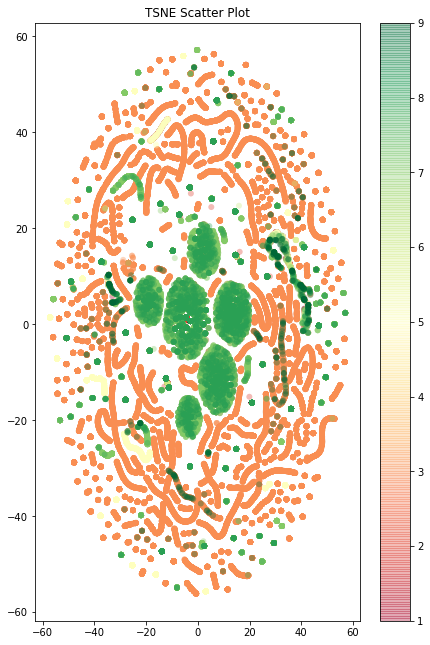

In [19]:
plt.figure(figsize = (16,11))

plt.subplot(122)
plt.scatter(tsne_results[:,0],tsne_results[:,1],  c = Y, 
            cmap = "RdYlGn", edgecolor = "None", alpha=0.35 )
plt.colorbar()
plt.title('TSNE Scatter Plot')
plt.show()

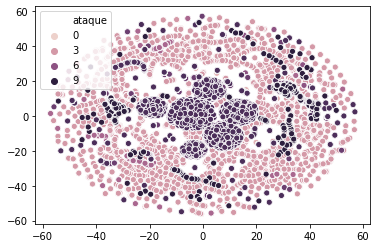

In [20]:
sns.scatterplot(tsne_results[:,0],tsne_results[:,1], hue = Y);

[t-SNE] Computing 28 nearest neighbors...
[t-SNE] Indexed 110853 samples in 11.735s...
[t-SNE] Computed neighbors for 110853 samples in 20.033s...
[t-SNE] Computed conditional probabilities for sample 1000 / 110853
[t-SNE] Computed conditional probabilities for sample 2000 / 110853
[t-SNE] Computed conditional probabilities for sample 3000 / 110853
[t-SNE] Computed conditional probabilities for sample 4000 / 110853
[t-SNE] Computed conditional probabilities for sample 5000 / 110853
[t-SNE] Computed conditional probabilities for sample 6000 / 110853
[t-SNE] Computed conditional probabilities for sample 7000 / 110853
[t-SNE] Computed conditional probabilities for sample 8000 / 110853
[t-SNE] Computed conditional probabilities for sample 9000 / 110853
[t-SNE] Computed conditional probabilities for sample 10000 / 110853
[t-SNE] Computed conditional probabilities for sample 11000 / 110853
[t-SNE] Computed conditional probabilities for sample 12000 / 110853
[t-SNE] Computed conditional proba

[t-SNE] Iteration 250: error = 90.2989044, gradient norm = 0.0814912 (50 iterations in 29.314s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 90.298904
[t-SNE] Iteration 300: error = 5.2896228, gradient norm = 0.0041221 (50 iterations in 29.384s)
[t-SNE] Iteration 350: error = 4.6209292, gradient norm = 0.0013276 (50 iterations in 24.899s)
[t-SNE] Iteration 400: error = 4.1393595, gradient norm = 0.0003851 (50 iterations in 27.869s)
[t-SNE] Iteration 450: error = 3.7186835, gradient norm = 0.0003040 (50 iterations in 23.411s)
[t-SNE] Iteration 500: error = 3.3896482, gradient norm = 0.0002500 (50 iterations in 22.140s)
[t-SNE] Iteration 550: error = 3.1213827, gradient norm = 0.0002270 (50 iterations in 21.829s)
[t-SNE] Iteration 600: error = 2.9053354, gradient norm = 0.0001961 (50 iterations in 27.924s)
[t-SNE] Iteration 650: error = 2.7166150, gradient norm = 0.0002171 (50 iterations in 27.260s)
[t-SNE] Iteration 700: error = 2.5613849, gradient norm = 0.000149

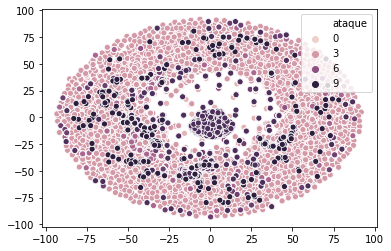

In [23]:
tsne = TSNE(verbose = 2, perplexity = 9, early_exaggeration = 11, learning_rate = 451, random_state = 0)
iris_t = tsne.fit_transform(X)
sns.scatterplot(iris_t[:, 0], iris_t[:, 1], hue = Y)